In [2]:
# prepared by Sam. feel free to consult (sirmaxford@gmail.com).
import fileinput, sys, shutil, os, time, socket, subprocess
import matplotlib; matplotlib.use('Agg') #set matplotlib to not use the Xwindows backend
import matplotlib.pyplot as plt; import pandas as pd; import numpy as np
%matplotlib inline
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

/home/nitta/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
columns = ['r', 'b', 'atp', 'md', 'v_av', 'v_sd']
df = pd.read_csv('vel_changes.csv', names=columns)

In [23]:
df[0:10]

,r,b,atp,md,v_av,v_sd
0,0.1,13,2000,3000,0.09893,0.08043
1,0.2,13,2000,3000,0.49694,0.44099
2,0.3,13,2000,3000,5.14376,3.07438
3,0.4,13,2000,3000,5.41553,2.34461
4,0.5,13,2000,3000,6.04005,3.28116
5,0.6,13,2000,3000,6.66972,1.15667
6,0.7,13,2000,3000,6.79622,1.10787
7,0.8,13,2000,3000,6.76524,1.07794
8,0.9,13,2000,3000,6.56418,1.04057
9,1.0,13,2000,3000,6.39632,0.53641


In [25]:
r_change = df[0:10]

In [26]:
r_change['v_av']

0    0.09893
1    0.49694
2    5.14376
3    5.41553
4    6.04005
5    6.66972
6    6.79622
7    6.76524
8    6.56418
9    6.39632
Name: v_av, dtype: float64

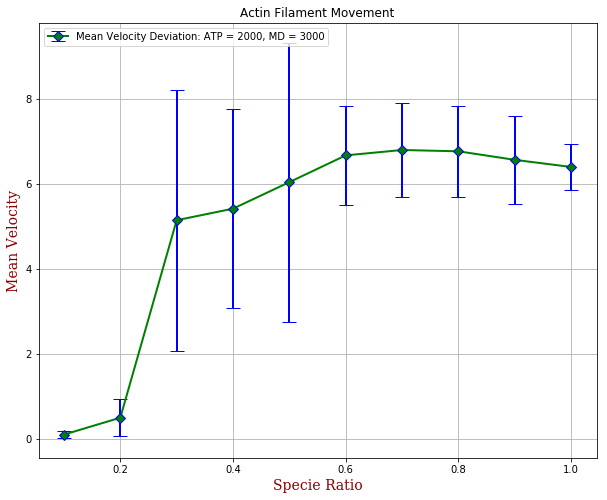

In [46]:
plt.figure(figsize=(10,8))
plt.errorbar(r_change['r'],r_change['v_av'],yerr=r_change['v_sd'], ecolor='b', capsize=7, \
             mec='blue', color='green', marker='D', linestyle='-', linewidth=2, \
             markersize=7, label='Mean Velocity Deviation: ATP = 2000, MD = 3000')
plt.xlabel('Specie Ratio', fontdict=font); plt.ylabel('Mean Velocity', fontdict=font)
plt.title('Actin Filament Movement'); plt.legend(loc='upper left'); plt.grid()

In [50]:
df[10:25]

,r,b,atp,md,v_av,v_sd
10,0.9,13,300,3000,3.16475,0.42185
11,0.9,13,600,3000,4.48637,0.46199
12,0.9,13,900,3000,5.22617,0.92963
13,0.9,13,1200,3000,5.47609,0.44497
14,0.9,13,1500,3000,6.15356,0.56837
15,0.9,13,1800,3000,6.38277,1.16754
16,0.9,13,2100,3000,6.64491,0.93268
17,0.9,13,2400,3000,6.67938,0.61918
18,0.9,13,2700,3000,6.65730,0.78833
19,0.9,13,3000,3000,7.02342,0.40345


In [51]:
atp_change = df[10:25]

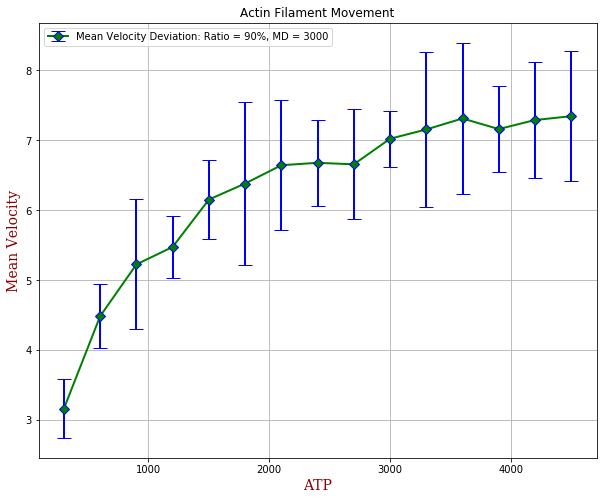

In [54]:
plt.figure(figsize=(10,8))
plt.errorbar(atp_change['atp'],atp_change['v_av'],yerr=atp_change['v_sd'], ecolor='b', capsize=7, \
             mec='blue', color='green', marker='D', linestyle='-', linewidth=2, \
             markersize=7, label='Mean Velocity Deviation: Ratio = 90%, MD = 3000')
plt.xlabel('ATP', fontdict=font); plt.ylabel('Mean Velocity', fontdict=font)
plt.title('Actin Filament Movement'); plt.legend(loc='upper left'); plt.grid()

In [56]:
df[25:30]

,r,b,atp,md,v_av,v_sd
25,0.9,13,2000,1000,5.93888,2.88525
26,0.9,13,2000,2000,6.73108,1.30774
27,0.9,13,2000,3000,6.56418,1.04057
28,0.9,13,2000,4000,6.39449,0.50562
29,0.9,13,2000,5000,5.77560,1.90921


In [57]:
md_change = df[25:30]

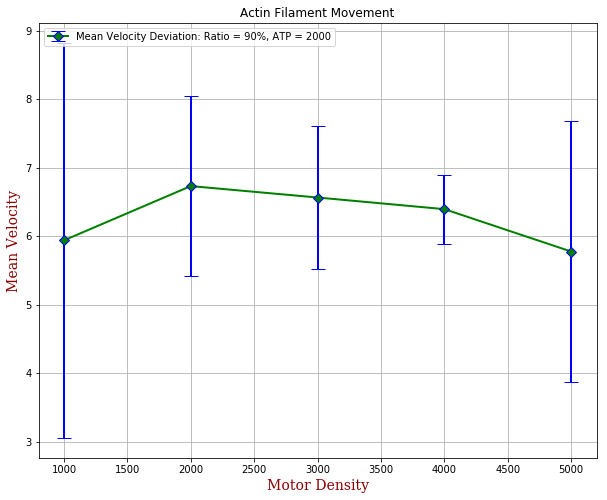

In [59]:
plt.figure(figsize=(10,8))
plt.errorbar(md_change['md'],md_change['v_av'],yerr=md_change['v_sd'], ecolor='b', capsize=7, \
             mec='blue', color='green', marker='D', linestyle='-', linewidth=2, \
             markersize=7, label='Mean Velocity Deviation: Ratio = 90%, ATP = 2000')
plt.xlabel('Motor Density', fontdict=font); plt.ylabel('Mean Velocity', fontdict=font)
plt.title('Actin Filament Movement'); plt.legend(loc='upper left'); plt.grid()